In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [4]:
print(f"training nums : {x_train.shape}")
print(f"training tags : {y_train.shape}")
print(f"training nums : {x_test.shape}")
print(f"training tags : {y_test.shape}")


print("There're 60000 28x28 pixels training data and 60000 training tags")

training nums : (60000, 28, 28)
training tags : (60000,)
training nums : (10000, 28, 28)
training tags : (10000,)
There're 60000 28x28 pixels training data and 60000 training tags


In [5]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential #The base for NN

from tensorflow.keras.layers import Dense  #Layers of NN
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import to_categorical #Taking tags to encode through One-Hot encoding. e.g. 4-> 0000100000
import matplotlib.pyplot as plt
import numpy as np

#Flattening all pixels to establish the units in a layer. (白話: 28x28像素的照片把他攤成一列，變成一層神經元的所有單元(共784個))
x_train = x_train.reshape(x_train.shape[0], 784)  
x_test = x_test.reshape(x_test.shape[0], 784)

print("Before One-Hot encoding ", y_train[2])

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print("After One-Hot encoding ", y_train[2])

In [6]:
#Building NN

model = Sequential()

#NN Content
model.add(Dense(256, activation = 'sigmoid', input_dim = 784))  #784個被攤出的單元作為特徵分給256個神經元以tanh為激勵函數輸出結果
model.add(Dense(128, activation = 'relu')) #{x| x<=, 0; x>0, x}
model.add(Dense(10, activation = 'softmax')) #輸出10個被分配的答案

#NN Finishing
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [6]:
plot_model(model, show_shapes = True, show_layer_names = True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


Epoch 1/50
59/59 [==============================] - 3s 13ms/step - loss: 0.2127 - accuracy: 0.6608
Epoch 2/50
59/59 [==============================] - 1s 14ms/step - loss: 0.0787 - accuracy: 0.8920
Epoch 3/50
59/59 [==============================] - 1s 14ms/step - loss: 0.0558 - accuracy: 0.9196
Epoch 4/50
59/59 [==============================] - 1s 13ms/step - loss: 0.0465 - accuracy: 0.9309
Epoch 5/50
59/59 [==============================] - 1s 15ms/step - loss: 0.0413 - accuracy: 0.9390
Epoch 6/50
59/59 [==============================] - 1s 14ms/step - loss: 0.0380 - accuracy: 0.9438
Epoch 7/50
59/59 [==============================] - 1s 14ms/step - loss: 0.0350 - accuracy: 0.9487
Epoch 8/50
59/59 [==============================] - 1s 15ms/step - loss: 0.0327 - accuracy: 0.9515
Epoch 9/50
59/59 [==============================] - 1s 14ms/step - loss: 0.0306 - accuracy: 0.9555
Epoch 10/50
59/59 [==============================] - 1s 14ms/step - loss: 0.0293 - accuracy: 0.9576
Epoch 11/

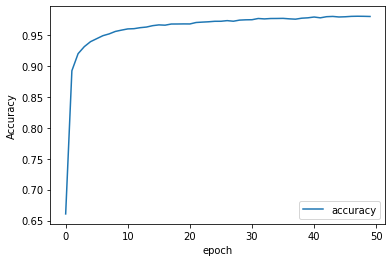

In [7]:
history = model.fit(x_train, y_train, verbose = 1, epochs = 50, batch_size = 1024)

plt.plot(history.history["accuracy"], label = "accuracy")
plt.ylabel("Accuracy")
plt.xlabel("epoch")
plt.legend(loc = "best")
plt.show()

In [8]:
score = model.evaluate(x_test, y_test, verbose = 1)
print(f"evaluate loss : {score[0]} \nevaluate accuracy : {score[1]}")

313/313 [==============================] - 3s 8ms/step - loss: 0.0201 - accuracy: 0.9683
evaluate loss : 0.02006451040506363 
evaluate accuracy : 0.9682999849319458


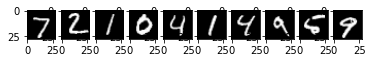

[7 2 1 0 4 1 4 9 6 9]


In [9]:
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_test[i].reshape(28, 28), "gray")
plt.show()

pred = np.argmax(model.predict(x_test[0:10]), axis = 1)
print(pred)